<a href="https://colab.research.google.com/github/aminayusif/Cyber-Guard/blob/main/CyberGuard_Machine_Learning_for_Cyberattack_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In today’s digital era, cyber threats are evolving rapidly, making traditional defense mechanisms increasingly inadequate. Organizations are now seeking intelligent, data-driven solutions to identify, classify, and mitigate cybersecurity threats in real time. This project, titled "CyberGuard: Machine Learning for Cyberattack Detection and Classification," applies machine learning (ML) techniques to network and system-level data to automatically detect and classify different types of cyberattacks.

The dataset used contains 40,000 labeled records of cybersecurity events, including features such as IP addresses, ports, protocols, payload data, anomaly scores, and metadata from firewall and intrusion detection systems. The primary objective is to develop a classification model that can predict the attack type based on these features, and optionally assess its severity level.

The project follows a complete ML pipeline, beginning with exploratory data analysis (EDA) to uncover patterns in attack behavior, protocol usage, and severity trends. In the data preprocessing phase, we handle missing values (particularly in logs such as IDS alerts and proxy information), encode categorical variables, and reduce high-cardinality fields that may lead to overfitting.

Feature engineering includes transforming timestamps into useful temporal features, encoding traffic types and protocols, and identifying significant indicators from anomaly scores. We then experiment with multiple supervised classification algorithms such as Random Forest, Logistic Regression, and Gradient Boosting, using grid search and cross-validation for optimization.

Model evaluation is conducted using metrics like accuracy, precision, recall, F1 score, and ROC-AUC. Confusion matrices and error analysis help interpret the model's performance and pinpoint common misclassifications, aiding in iterative improvements.

The final output is a trained ML model capable of identifying and classifying cyberattacks, which could be integrated into security systems for automated detection. The project not only demonstrates the practical use of machine learning in cybersecurity but also highlights the importance of combining domain knowledge with data science to build intelligent defense mechanisms.

This solution can help cybersecurity teams improve response times, reduce false positives, and better allocate resources in the face of increasingly sophisticated threats.

## Objectives

- Perform exploratory data analysis (EDA) on cybersecurity logs
- Clean and preprocess high-volume network data
- Engineer relevant features from raw logs
- Train and evaluate machine learning models to detect and classify attack types
- Analyze model performance using metrics and error analysis


## Exploratory Data Analysis and Data Preprocessing

### Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview

 The dataset for this case study is provided in the file cybersecurity_attacks.csv
 and contains approximately 40,000 records. The key attributes include IP addresses, protocol, ports, payload data, anomaly scores, attack type

**Network activity** : IP, Port, Protocol, Packet Length

**System-level data** : User Info, Device Info, Geo-location

**Security-specific logs** : Anomaly Scores, Firewall Logs, Attack Signature

**Labels** : Attack Type, Severity Level

#### Import Dataset

In [2]:
import pandas as pd

data = pd.read_csv('cybersecurity_attacks.csv')

print("Dataset Overview:")
display(data.head())

print("\nColumn Information:")
display(data.info())

Dataset Overview:


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               9404 non-null   object 
 1   Source IP Address       9404 non-null   object 
 2   Destination IP Address  9404 non-null   object 
 3   Source Port             9404 non-null   int64  
 4   Destination Port        9404 non-null   int64  
 5   Protocol                9404 non-null   object 
 6   Packet Length           9404 non-null   int64  
 7   Packet Type             9404 non-null   object 
 8   Traffic Type            9404 non-null   object 
 9   Payload Data            9404 non-null   object 
 10  Malware Indicators      4695 non-null   object 
 11  Anomaly Scores          9404 non-null   float64
 12  Alerts/Warnings         4683 non-null   object 
 13  Attack Type             9404 non-null   object 
 14  Attack Signature   

None

In [3]:
data.shape

(9404, 25)

Dataset consists of 40,000 rows and 25 columns

Let's check for null values

In [4]:
data.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


These columns have null values:
1. Malware Indicators
2. Alerts/Warnings
3. Proxy Information
4. Firewall Logs
5. IDS/IPS Alerts


In [5]:
# List of columns with null values to impute
columns_to_impute = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Replace null values with "Unknown" or "No Data"
data[columns_to_impute] = data[columns_to_impute].fillna('Unknown')

print("\nNull values after imputation:")
display(data.isnull().sum())


Null values after imputation:


,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


We now have no missing values in any column

We want to drop columns which have no substantial information:

1. Source IP Address
2. Destination IP Address
3. Payload Data
4. User Information
5. Device Information

In [6]:
# List of columns to drop
columns_to_drop = ['Source IP Address', 'Destination IP Address', 'Payload Data', 'User Information', 'Device Information']

# Drop the specified columns
data = data.drop(columns=columns_to_drop) # These columns to be dropped



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           9404 non-null   object 
 1   Source Port         9404 non-null   int64  
 2   Destination Port    9404 non-null   int64  
 3   Protocol            9404 non-null   object 
 4   Packet Length       9404 non-null   int64  
 5   Packet Type         9404 non-null   object 
 6   Traffic Type        9404 non-null   object 
 7   Malware Indicators  9404 non-null   object 
 8   Anomaly Scores      9404 non-null   float64
 9   Alerts/Warnings     9404 non-null   object 
 10  Attack Type         9404 non-null   object 
 11  Attack Signature    9404 non-null   object 
 12  Action Taken        9404 non-null   object 
 13  Severity Level      9403 non-null   object 
 14  Network Segment     9403 non-null   object 
 15  Geo-location Data   9403 non-null   object 
 16  Proxy 

In [8]:
data.shape

(9404, 20)

### Class Distributions, Class Balance and Anomaly Trends

#### Class Distributions

##### 1. Attack Types

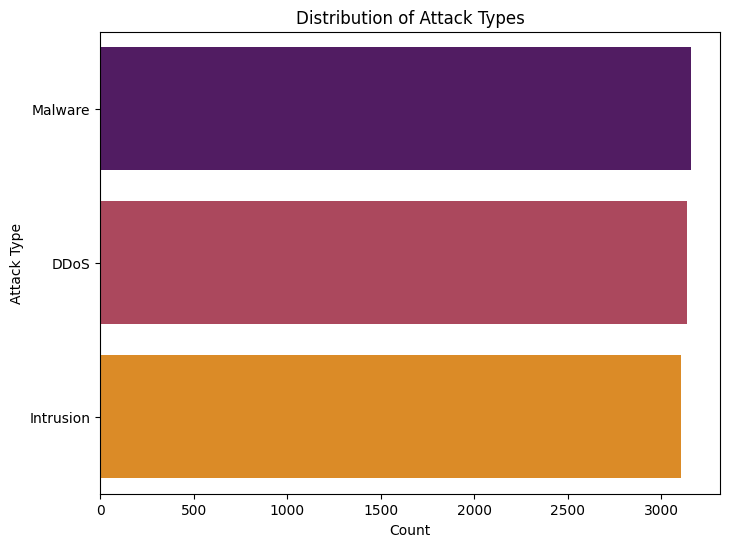


Attack Type distribution percentages:


,proportion
Attack Type,
Malware,33.581455
DDoS,33.379413
Intrusion,33.039132


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Attack Type', order=data['Attack Type'].value_counts().index, palette='inferno')
plt.title('Distribution of Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

print("\nAttack Type distribution percentages:")
display(data['Attack Type'].value_counts(normalize=True) * 100)

##### 2. Protocol Usage

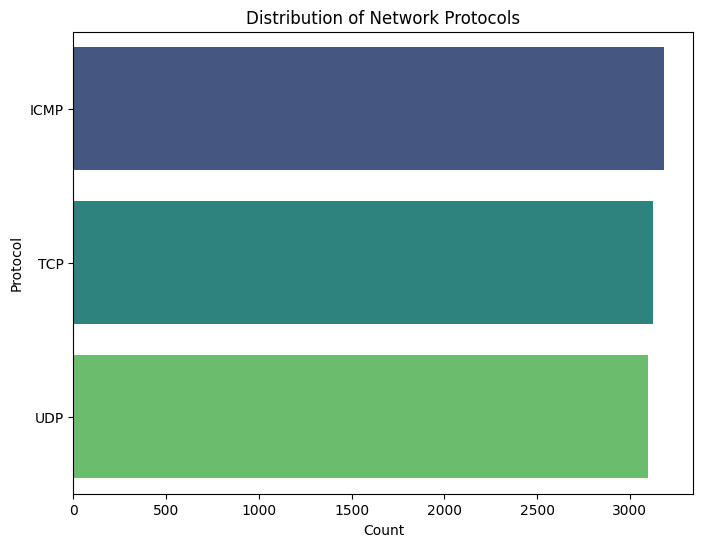


Protocol distribution percentages:


,proportion
Protocol,
ICMP,33.847299
TCP,33.209273
UDP,32.943428


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Protocol', order=data['Protocol'].value_counts().index, palette='viridis')
plt.title('Distribution of Network Protocols')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.show()

print("\nProtocol distribution percentages:")
display(data['Protocol'].value_counts(normalize=True) * 100)

 ##### 3. Severity Levels

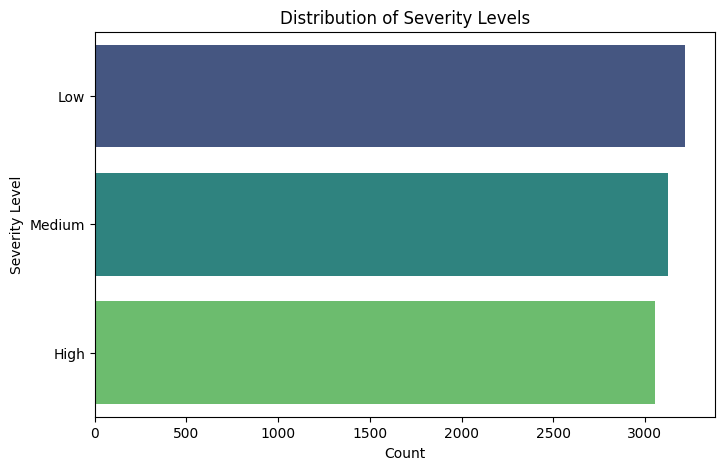

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Severity Level', order=data['Severity Level'].value_counts().index, palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Count')
plt.ylabel('Severity Level')
plt.show()

##### 4. Packet Types

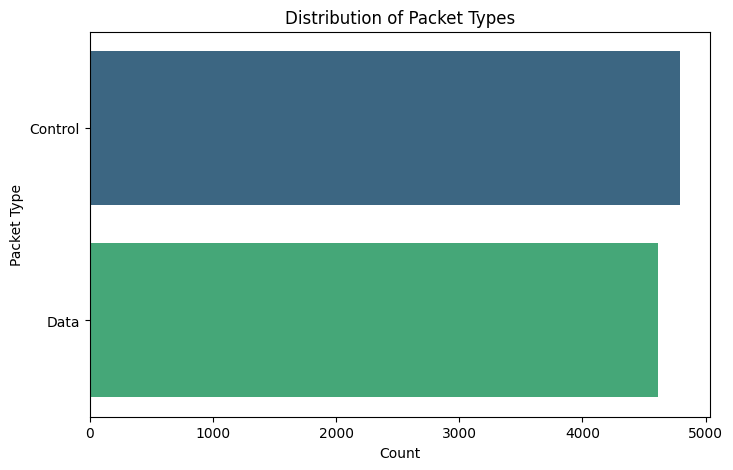

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Packet Type', order=data['Packet Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Packet Types')
plt.xlabel('Count')
plt.ylabel('Packet Type')
plt.show()

##### 5. Traffic Types

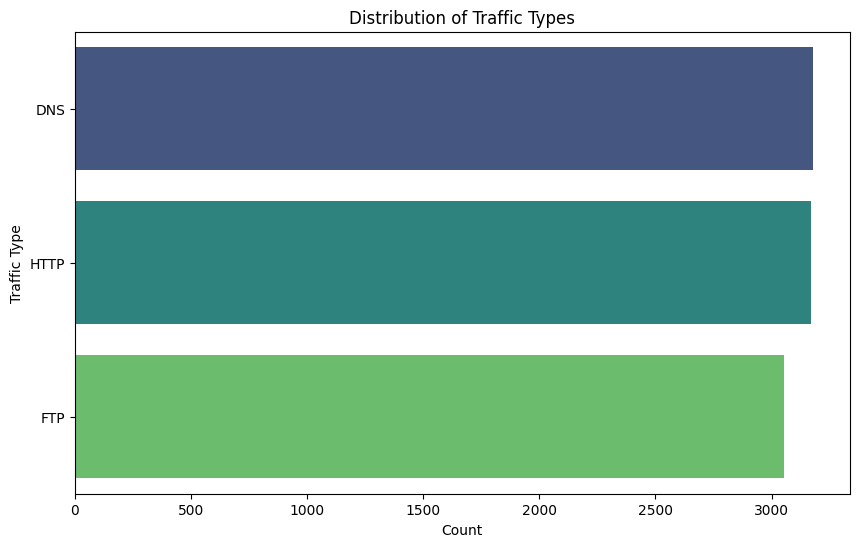

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Traffic Type', order=data['Traffic Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Traffic Types')
plt.xlabel('Count')
plt.ylabel('Traffic Type')
plt.show()

##### 6. Log Sources

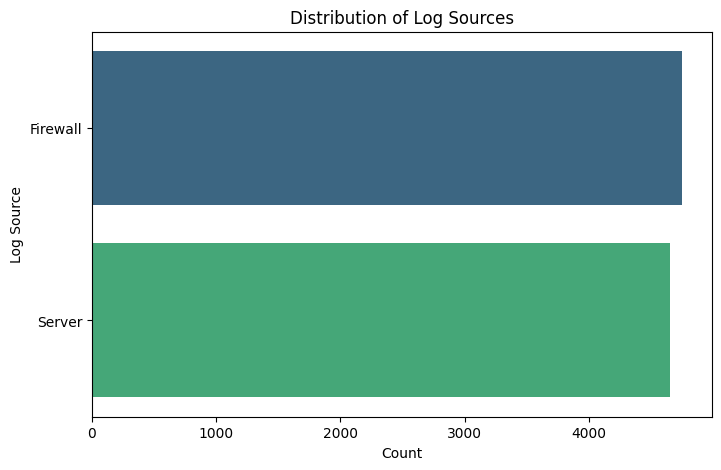

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Log Source', order=data['Log Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Log Sources')
plt.xlabel('Count')
plt.ylabel('Log Source')
plt.show()

##### 7. Packet Lengths

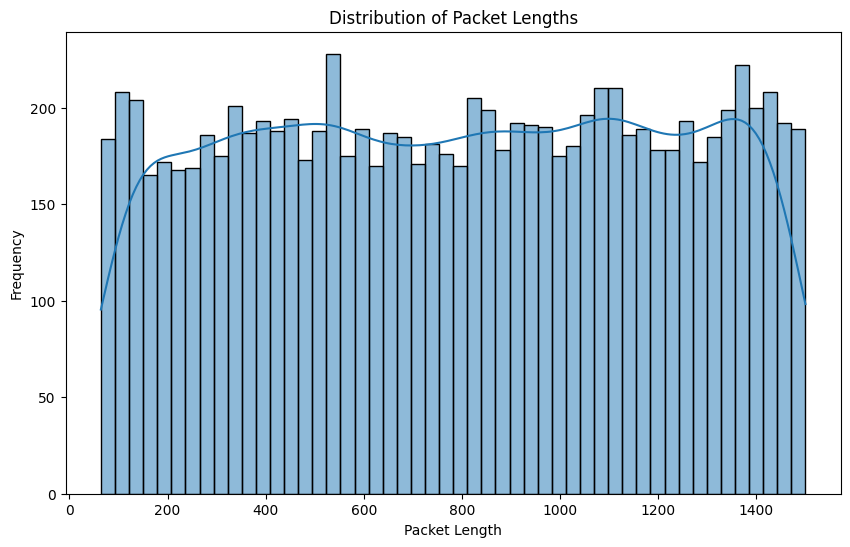

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Packet Length'], bins=50, kde=True)
plt.title('Distribution of Packet Lengths')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

 ### Correlation Matrix of Numerical Features

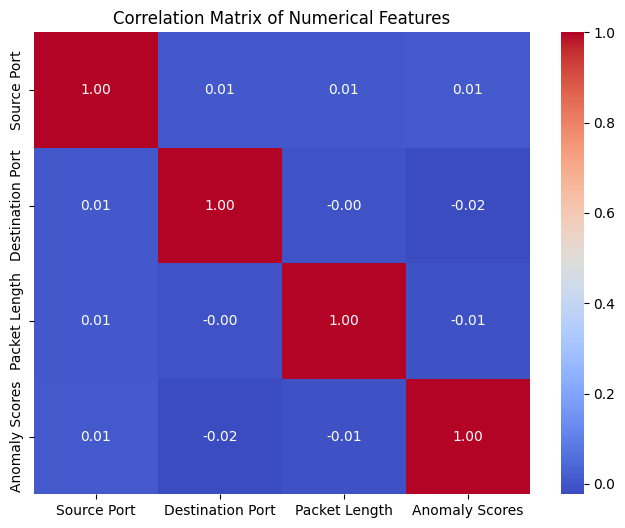

In [16]:
numerical_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can infer from this matrix is that there is very little to no linear correlation between the numerical features **'Source Port', 'Destination Port', 'Packet Length', and 'Anomaly Scores'** in this dataset. This means that changes in one of these numerical features are not linearly associated with changes in the others.

This is a useful finding for model building, as it suggests that multicollinearity is not a significant issue among these specific numerical features.

### Summary of EDA Findings

Based on the analysis:

**Class Distributions and Class Balance:**
[Summarize findings from the Attack Type distribution plot and value counts here]

**Protocol Usage:**
[Summarize findings from the Protocol distribution plot and value counts here]

**Anomaly Score Trends:**
[Summarize findings from the Anomaly Score statistics and histogram here]

### Feature Engineering

#### Timestamp Based Features

Convert timestamp to datetime

In [17]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

In [18]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           9404 non-null   datetime64[ns]
 1   Source Port         9404 non-null   int64         
 2   Destination Port    9404 non-null   int64         
 3   Protocol            9404 non-null   object        
 4   Packet Length       9404 non-null   int64         
 5   Packet Type         9404 non-null   object        
 6   Traffic Type        9404 non-null   object        
 7   Malware Indicators  9404 non-null   object        
 8   Anomaly Scores      9404 non-null   float64       
 9   Alerts/Warnings     9404 non-null   object        
 10  Attack Type         9404 non-null   object        
 11  Attack Signature    9404 non-null   object        
 12  Action Taken        9404 non-null   object        
 13  Severity Level      9403 non-null   object      

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,Malware,Known Pattern B,Logged,Low,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Unknown,Server
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,Malware,Known Pattern A,Blocked,Low,Segment B,"Bilaspur, Nagaland",Unknown,Log Data,Unknown,Firewall
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B,"Jaunpur, Rajasthan",Unknown,Unknown,Alert Data,Firewall
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C,"Anantapur, Tripura",149.6.110.119,Unknown,Alert Data,Firewall


Now separate timestamp into hour, day of week, isweekend and month

In [19]:
    data['Hour'] = data['Timestamp'].dt.hour
    data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
    data['IsWeekend'] = data['DayOfWeek'].isin([5, 6]).astype(int)
    data['Month'] = data['Timestamp'].dt.month

In [20]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           9404 non-null   datetime64[ns]
 1   Source Port         9404 non-null   int64         
 2   Destination Port    9404 non-null   int64         
 3   Protocol            9404 non-null   object        
 4   Packet Length       9404 non-null   int64         
 5   Packet Type         9404 non-null   object        
 6   Traffic Type        9404 non-null   object        
 7   Malware Indicators  9404 non-null   object        
 8   Anomaly Scores      9404 non-null   float64       
 9   Alerts/Warnings     9404 non-null   object        
 10  Attack Type         9404 non-null   object        
 11  Attack Signature    9404 non-null   object        
 12  Action Taken        9404 non-null   object        
 13  Severity Level      9403 non-null   object      

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Unknown,Server,6,1,0,5
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,...,Segment B,"Bilaspur, Nagaland",Unknown,Log Data,Unknown,Firewall,7,2,0,8
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,1,11
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,...,Segment B,"Jaunpur, Rajasthan",Unknown,Unknown,Alert Data,Firewall,10,6,1,7
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,...,Segment C,"Anantapur, Tripura",149.6.110.119,Unknown,Alert Data,Firewall,13,6,1,7


#### Network features

a. Port Category

> Classify ports as well-known (0–1023), registered (1024–49151), or dynamic



In [21]:
def categorize_port(port):
        if port <= 1023:
            return 'Well-Known'
        elif port <= 49151:
            return 'Registered'
        else:
            return 'Dynamic'

data['Source Port Category'] = data['Source Port'].apply(categorize_port)
data['Destination Port Category'] = data['Destination Port'].apply(categorize_port)

In [22]:
data.head()

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month,Source Port Category,Destination Port Category
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,...,150.9.97.135,Log Data,Unknown,Server,6,1,0,5,Registered,Registered
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,...,Unknown,Log Data,Unknown,Firewall,7,2,0,8,Registered,Registered
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,114.133.48.179,Log Data,Alert Data,Firewall,8,6,1,11,Registered,Dynamic
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,...,Unknown,Unknown,Alert Data,Firewall,10,6,1,7,Registered,Registered
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,...,149.6.110.119,Unknown,Alert Data,Firewall,13,6,1,7,Registered,Registered


b. Packet Size Bin



> Categorize Packet Length as Small/Medium/Large using binning



In [23]:
data['Packet Size Category'] = pd.cut(
       data['Packet Length'],
        bins=[-1, 500, 1000, np.inf],
        labels=['Small', 'Medium', 'Large']
    )


#### Security-Related Features

Malware indicator flag



> Convert 'IoC Detected' into binary 1/0 or category (None, IoC Detected



In [24]:
data['MalwareFlag'] = data['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else 0)
data.head()

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month,Source Port Category,Destination Port Category,Packet Size Category,MalwareFlag
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,...,Unknown,Server,6,1,0,5,Registered,Registered,Medium,1
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,...,Unknown,Firewall,7,2,0,8,Registered,Registered,Large,1
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,Alert Data,Firewall,8,6,1,11,Registered,Dynamic,Small,1
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,...,Alert Data,Firewall,10,6,1,7,Registered,Registered,Small,0
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,...,Alert Data,Firewall,13,6,1,7,Registered,Registered,Large,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  9404 non-null   datetime64[ns]
 1   Source Port                9404 non-null   int64         
 2   Destination Port           9404 non-null   int64         
 3   Protocol                   9404 non-null   object        
 4   Packet Length              9404 non-null   int64         
 5   Packet Type                9404 non-null   object        
 6   Traffic Type               9404 non-null   object        
 7   Malware Indicators         9404 non-null   object        
 8   Anomaly Scores             9404 non-null   float64       
 9   Alerts/Warnings            9404 non-null   object        
 10  Attack Type                9404 non-null   object        
 11  Attack Signature           9404 non-null   object        
 12  Action

### Model Selection and Training

In the Model Selection & Training phase, we will perform the following:

1. Perform One-Hot Encoding for categorical features

2. Scale numerical features if needed

3. Train a classifier (e.g., Random Forest)

4. Evaluate using Precision, Recall, and F1 Score from the classification_report




🔍 Model: Logistic Regression
              precision    recall  f1-score   support

        DDoS       0.32      0.35      0.34       629
   Intrusion       0.36      0.30      0.33       634
     Malware       0.31      0.34      0.32       618

    accuracy                           0.33      1881
   macro avg       0.33      0.33      0.33      1881
weighted avg       0.33      0.33      0.33      1881



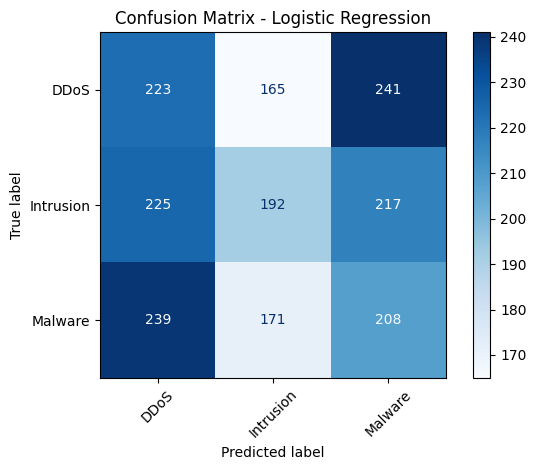


🔍 Model: Random Forest
              precision    recall  f1-score   support

        DDoS       0.34      0.37      0.36       629
   Intrusion       0.33      0.30      0.31       634
     Malware       0.35      0.35      0.35       618

    accuracy                           0.34      1881
   macro avg       0.34      0.34      0.34      1881
weighted avg       0.34      0.34      0.34      1881



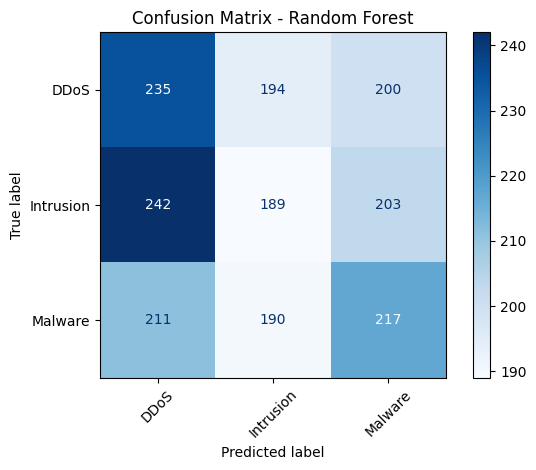


🔍 Model: Gradient Boosting
              precision    recall  f1-score   support

        DDoS       0.33      0.33      0.33       629
   Intrusion       0.35      0.32      0.33       634
     Malware       0.31      0.33      0.32       618

    accuracy                           0.33      1881
   macro avg       0.33      0.33      0.33      1881
weighted avg       0.33      0.33      0.33      1881



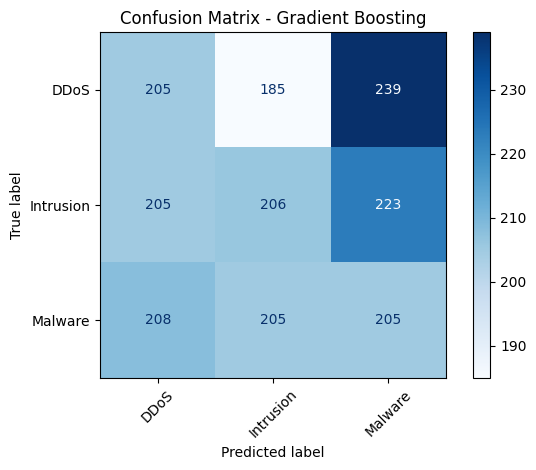

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define features and target
# Drop the original Timestamp column after feature engineering
X = data.drop(columns=['Attack Type', 'Timestamp','Geo-location Data'])
y = data['Attack Type']

# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": HistGradientBoostingClassifier(random_state=42)
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Model: {name}")

    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # For HistGradientBoostingClassifier, convert sparse output to dense
    if isinstance(model, HistGradientBoostingClassifier):
        X_train_processed = pipeline.named_steps['preprocessor'].fit_transform(X_train).toarray()
        X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test).toarray()
        # Fit the classifier directly with the dense data
        pipeline.named_steps['classifier'].fit(X_train_processed, y_train)
        y_pred = pipeline.named_steps['classifier'].predict(X_test_processed)
    else:
        # Fit and predict using the pipeline for models that handle sparse data
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)


    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

feature importance for logistic regression

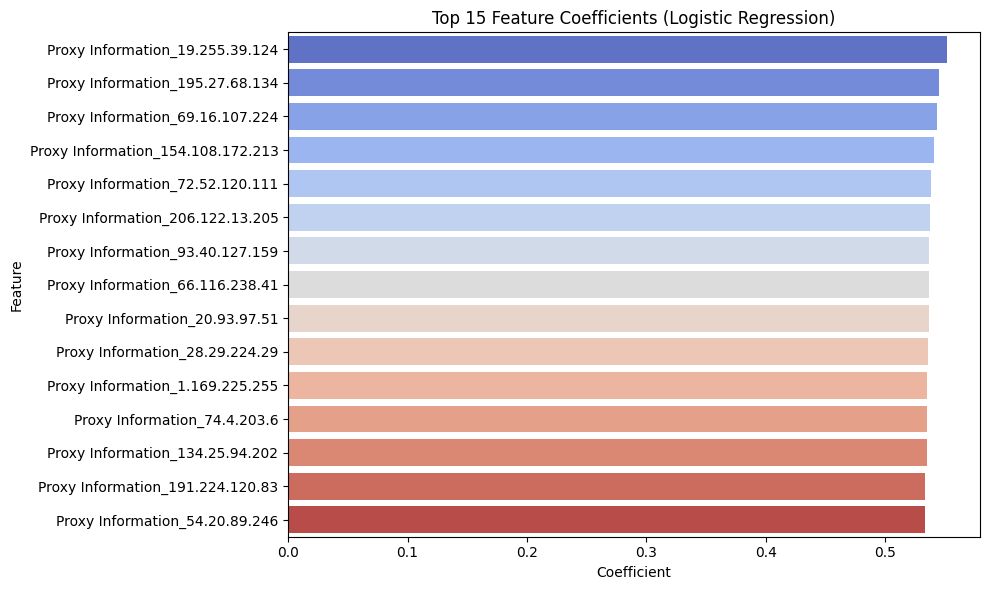

In [34]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify feature types (assuming X_train is already defined from previous cells)
numeric_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline (ensure it's defined or use the one from previous cells)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns that are not numeric or categorical
)

# Create a pipeline with the preprocessor and Logistic Regression model
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the pipeline
pipeline_lr.fit(X_train, y_train)

# Get the fitted Logistic Regression model from the pipeline
lr_model = pipeline_lr.named_steps['classifier']

# Get coefficients
coefficients = lr_model.coef_[0]

# Get feature names after preprocessing
# This requires getting the feature names from the one-hot encoder within the preprocessor
ohe_feature_names = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
passthrough_features = [col for col in X_train.columns if col not in numeric_features + categorical_features]
all_feature_names = list(numeric_features) + list(ohe_feature_names) + list(passthrough_features)


# Create a DataFrame
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm')
plt.title('Top 15 Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()

feature importance for random forest

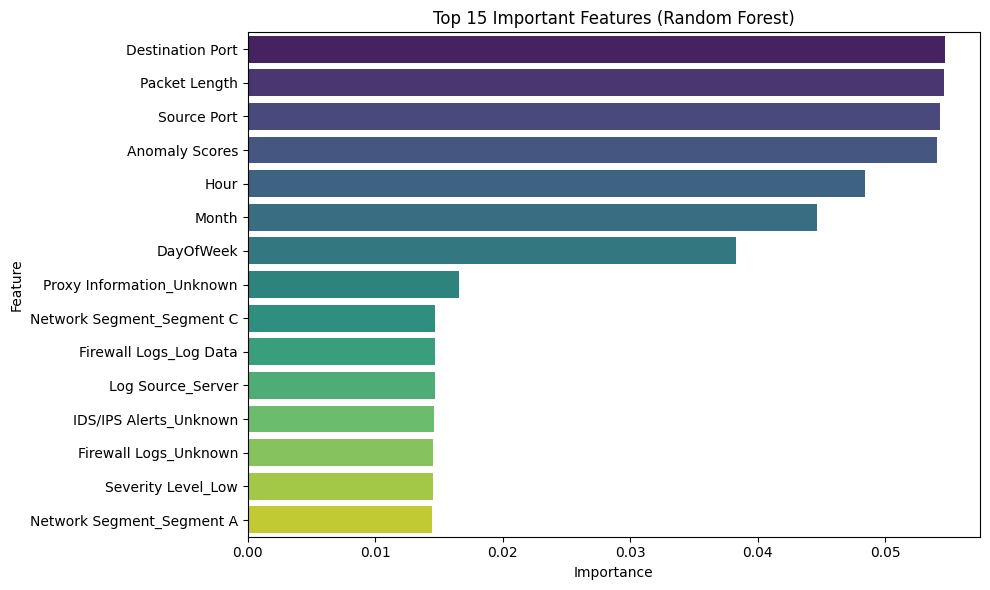

In [28]:
# Fit your model
rf = RandomForestClassifier(random_state=42)

# Apply the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)

rf.fit(X_train_processed, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get the names of the features after one-hot encoding
# This requires getting the feature names from the one-hot encoder within the preprocessor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_features) + list(ohe_feature_names)


# Create a DataFrame
feat_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15), palette='viridis')
plt.title('Top 15 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

check if we encoded the categorical variables appropriately

In [35]:
# Apply the preprocessor to a small sample of the training data
# Use .iloc[:5] to get the first 5 rows for a quick check
X_train_processed_sample = preprocessor.transform(X_train.iloc[:5])

# The output is a sparse matrix, convert it to a dense array for easier viewing
X_train_processed_sample_dense = X_train_processed_sample.toarray()

# Get the names of the features after one-hot encoding and other transformations
# This requires getting the feature names from the one-hot encoder within the preprocessor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_feature_names = numeric_features # Numeric features names remain the same
passthrough_features = [col for col in X_train.columns if col not in numeric_features + categorical_features] # Assuming 'remainder' is 'passthrough'
all_feature_names = list(numeric_feature_names) + list(ohe_feature_names) + list(passthrough_features)

# Create a DataFrame with meaningful column names (though it can be very wide)
# For a full inspection, consider inspecting specific columns or the sparse matrix structure
processed_df_sample = pd.DataFrame(X_train_processed_sample_dense, columns=all_feature_names)

print("Sample of Preprocessed Data (showing encoded categorical features):")
display(processed_df_sample)

Sample of Preprocessed Data (showing encoded categorical features):


,Source Port,Destination Port,Packet Length,Anomaly Scores,Hour,DayOfWeek,IsWeekend,Month,MalwareFlag,Protocol_ICMP,...,Log Source_Firewall,Log Source_Server,Log Source_nan,Source Port Category_Dynamic,Source Port Category_Registered,Destination Port Category_Dynamic,Destination Port Category_Registered,Packet Size Category_Large,Packet Size Category_Medium,Packet Size Category_Small
0,-0.638735,0.680078,-1.037645,-0.318643,-1.523167,0.995905,1.582390,-0.695293,-0.996153,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.328567,-1.005585,-0.475392,-1.366672,-0.798111,0.995905,1.582390,-1.293188,-0.996153,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.328547,1.459503,0.012375,-1.581616,0.797012,0.995905,1.582390,-1.293188,-0.996153,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.536508,-1.173899,0.963881,1.182156,-0.798111,0.497952,-0.631955,0.799445,-0.996153,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.456257,1.532451,-0.350446,1.161008,-0.798111,-0.497952,-0.631955,-1.592135,1.003862,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


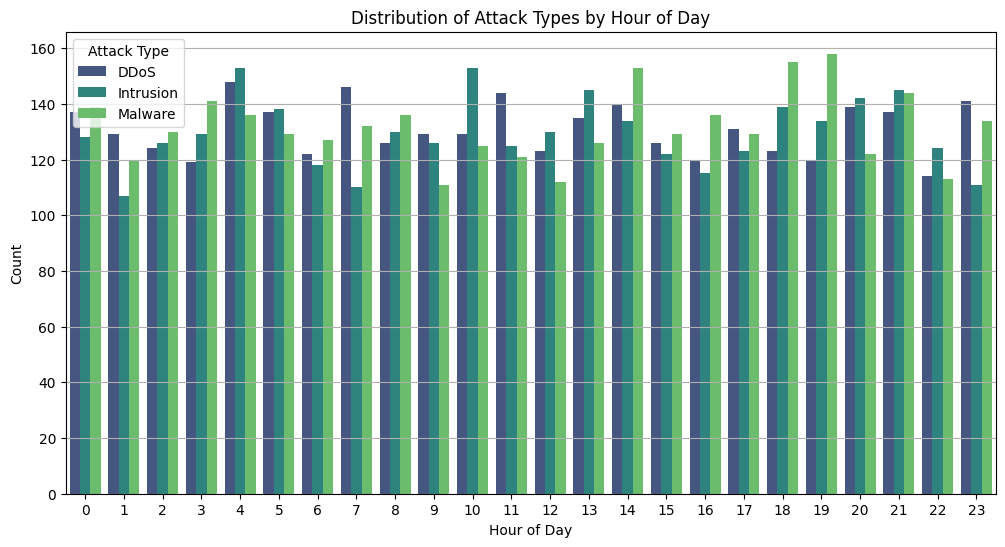

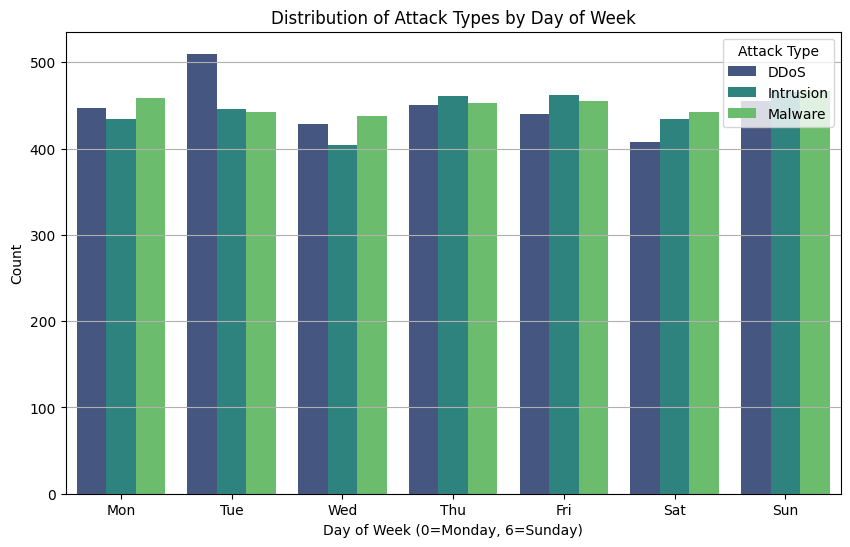

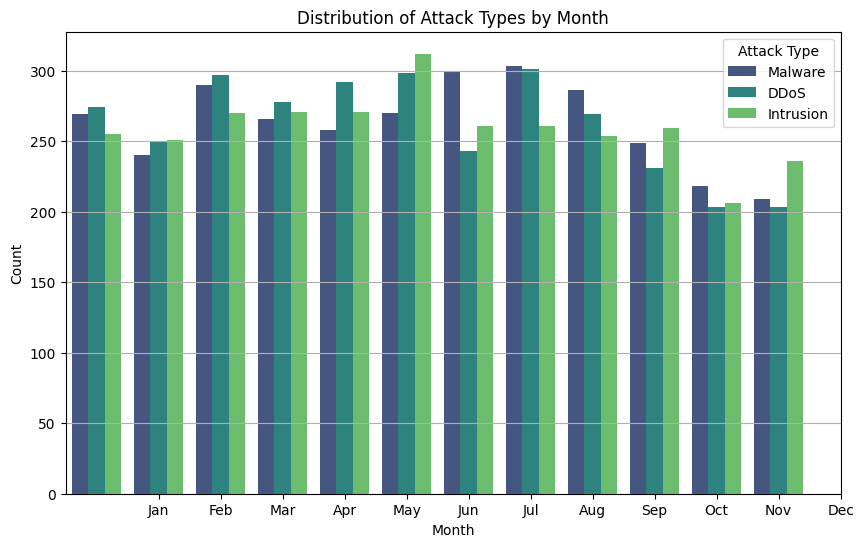

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Attack Types by Hour
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Hour', hue='Attack Type', palette='viridis')
plt.title('Distribution of Attack Types by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.show()

# Distribution of Attack Types by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DayOfWeek', hue='Attack Type', palette='viridis')
plt.title('Distribution of Attack Types by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.show()

# Distribution of Attack Types by Month
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', hue='Attack Type', palette='viridis')
plt.title('Distribution of Attack Types by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.show()